In [1]:
words = open('names.txt','r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
# start looking at bigrams, just count how many times these occur
b = {} # storing bigram counts
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]): # only runs to length of smaller zipped thing
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [7]:
sorted(b.items(), key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
# represent this as 2d array with row as first char and col as second 

In [9]:
import torch

In [10]:
N = torch.zeros((27,27),dtype=torch.int32)

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [12]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]): # only runs to length of smaller zipped thing
        ix1,ix2 = stoi[ch1],stoi[ch2]
        N[ix1,ix2]+=1
        

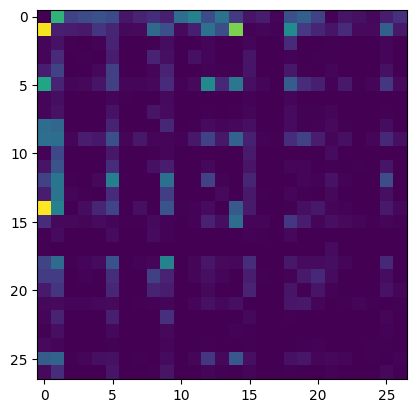

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i,chstr, ha='center', va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(), ha='center',va='top',color='gray')
plt.axis('off')

(-0.5, 26.5, 26.5, -0.5)

In [15]:
N[0,:] # equiv N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [16]:
p = N[0].float()
p/=p.sum() # probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [17]:
# samples from the above : use torch.multinomial
# make deterministic : use torch.Generator

g = torch.Generator().manual_seed(2147483647)
# p = torch.rand(3, generator=g)
# p/=p.sum()
# p


In [18]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [19]:
P = (N+1).float() # model smoothing 



In [20]:
P.sum(1,keepdim=True).shape

torch.Size([27, 1])

In [21]:
P.sum(1,keepdim=True).broadcast_to((27,27)) # streches out across the columns so copies same values across all columns

tensor([[32060., 32060., 32060., 32060., 32060., 32060., 32060., 32060., 32060.,
         32060., 32060., 32060., 32060., 32060., 32060., 32060., 32060., 32060.,
         32060., 32060., 32060., 32060., 32060., 32060., 32060., 32060., 32060.],
        [33912., 33912., 33912., 33912., 33912., 33912., 33912., 33912., 33912.,
         33912., 33912., 33912., 33912., 33912., 33912., 33912., 33912., 33912.,
         33912., 33912., 33912., 33912., 33912., 33912., 33912., 33912., 33912.],
        [ 2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,
          2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,
          2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.,  2672.],
        [ 3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,
          3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,
          3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.,  3559.],
        [ 5523.,  5523.,

In [22]:
P.sum(1).broadcast_to((27,27)) # streches out across the row, so copies same value across rows
# so this would be column normalization

tensor([[32060., 33912.,  2672.,  3559.,  5523., 20450.,   932.,  1954.,  7643.,
         17728.,  2927.,  5067., 13985.,  6669., 18354.,  7961.,  1053.,   299.,
         12727.,  8133.,  5597.,  3162.,  2600.,   956.,   724.,  9803.,  2425.],
        [32060., 33912.,  2672.,  3559.,  5523., 20450.,   932.,  1954.,  7643.,
         17728.,  2927.,  5067., 13985.,  6669., 18354.,  7961.,  1053.,   299.,
         12727.,  8133.,  5597.,  3162.,  2600.,   956.,   724.,  9803.,  2425.],
        [32060., 33912.,  2672.,  3559.,  5523., 20450.,   932.,  1954.,  7643.,
         17728.,  2927.,  5067., 13985.,  6669., 18354.,  7961.,  1053.,   299.,
         12727.,  8133.,  5597.,  3162.,  2600.,   956.,   724.,  9803.,  2425.],
        [32060., 33912.,  2672.,  3559.,  5523., 20450.,   932.,  1954.,  7643.,
         17728.,  2927.,  5067., 13985.,  6669., 18354.,  7961.,  1053.,   299.,
         12727.,  8133.,  5597.,  3162.,  2600.,   956.,   724.,  9803.,  2425.],
        [32060., 33912.,

In [23]:
# 27, 27
# 27, 1
P /= P.sum(1,keepdim=True) # broadcasted # practice it very well
# inplace op is faster

In [24]:
P.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [25]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    ix = 0
    out = []
    while True:
        p = P[ix]
#         p = N[ix].float()
#         p = p/p.sum()
        ix = torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))
    

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [26]:
# Evaluate the quality of this model

# likelihood : product of the probabilities 
# for conv, use log likelihood

# GOAL: maximize likelihood of the data wrt model params (statictical modeling)
# equivalent to maximizing the log likelihood (as log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood



In [27]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]): # only runs to length of smaller zipped thing
        ix1,ix2 = stoi[ch1],stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}') # usually the loss func

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [28]:
# use a neural net which predicts probability for the next character


In [29]:
# create training set of bigrams (x,y) [first char, next char]
xs , ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]): # only runs to length of smaller zipped thing
        ix1,ix2 = stoi[ch1],stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [30]:
xs

tensor([ 0,  5, 13, 13,  1])

In [31]:
ys

tensor([ 5, 13, 13,  1,  0])

In [32]:
import torch.nn.functional as F

In [33]:
xenc = F.one_hot(xs,num_classes=27).float()
yenc = F.one_hot(ys,num_classes=27).float()

In [34]:
xenc.shape


torch.Size([5, 27])

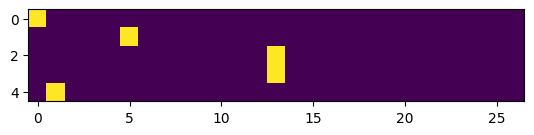

In [35]:
plt.imshow(xenc)

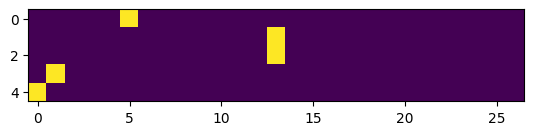

In [36]:
plt.imshow(yenc)

In [37]:
# W = torch.randn((27,1)) # Single neuron
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g) # 27 neurons

In [38]:
# xenc @ W # 5x27 @ 27x1 = 5x1

xenc @ W # 5x27 @ 27x27 = 5x27


tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2198e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [39]:
(xenc @ W)[3,13] # 3 input on 13 neurons 
# manually would be (xenc[3]*W[:,13]).sum()

tensor(0.0379)

In [40]:
# (5,27) @ (27,27) -> (5,27) 
# these 27 numbers are giving us log counts for each the chars

In [41]:
logits = xenc@W # log counts
counts = logits.exp()  # equivalents of the count matrix N above
probs = counts/counts.sum(1,keepdims=True)

In [42]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [43]:
probs.shape

torch.Size([5, 27])

In [44]:
probs[0].sum()

tensor(1.0000)

In [45]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g) # 27 neurons

In [46]:

xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc@W # predict log counts
counts = logits.exp() # counts, N Matrix from before
probs = counts/counts.sum(1,keepdim=True) # prob for next char
# last 2 lines are SOFTMAX: make a NN output probability


In [47]:
nlls = torch.zeros(5)
for i in range(5):
    # ith bigram
    x = xs[i].item() # input char idx
    y = ys[i].item() # label char idx
    print('----')
    print(f'bigram eg {i+1}: {itos[x]}{itos[y]} (indices {x},{y})')
    print(f'input to neural net: {x}')
    print(f'output prob from nn: {probs[i]}')
    print(f'label (actual next char): {y}')
    p = probs[i,y]
    print('prob of next actual char: ', p.item())
    logp = torch.log(p)
    print(f'{logp=}')
    nll = -logp
    print(f'{nll=}')
    nlls[i]=nll

print(f'{nlls=}')
print(f'average log likelihood ie the loss: {nlls.mean().item()}')

----
bigram eg 1: .e (indices 0,5)
input to neural net: 0
output prob from nn: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next char): 5
prob of next actual char:  0.012286253273487091
logp=tensor(-4.3993)
nll=tensor(4.3993)
----
bigram eg 2: em (indices 5,13)
input to neural net: 5
output prob from nn: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next char): 13
prob of next actual char:  0.018050702288746834
logp=tensor(-4.0146)
nll=tensor(4.0146)
----
bigram eg 3: mm (indices 13,13)
input to neural net: 13
output prob from nn: tensor([0.0312, 0.0737, 0.0484, 0.0333, 0.06

In [48]:
# random init W
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) # 27 neurons

In [49]:
#Forward pass
xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc@W # predict log counts
counts = logits.exp() # counts, N Matrix from before
probs = counts/counts.sum(1,keepdim=True) # prob for next char
loss= -probs[torch.arange(5),ys].log().mean()
print(loss)

tensor(3.7693, grad_fn=<NegBackward0>)


In [50]:
# backward pass
W.grad = None # zero grad
loss.backward()

In [51]:
# update params
W.data += -0.5*W.grad

In [52]:
# ------------------


In [53]:
# create dataset 
xs , ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]): # only runs to length of smaller zipped thing
        ix1,ix2 = stoi[ch1],stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('num of eg: ',num)
xenc = F.one_hot(xs,num_classes=27).float()
# random init W
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) # 27 neurons
# label smoothing : pushing W to be zero, they want to be more uniform 

num of eg:  228146


In [54]:
(W**2).mean()

tensor(0.9665, grad_fn=<MeanBackward0>)

In [55]:
# Gradient descent
for k in range(100):
    #Forward pass
    
    logits = xenc@W # predict log counts
    counts = logits.exp() # counts, N Matrix from before
    probs = counts/counts.sum(1,keepdim=True) # prob for next char
    loss= -probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()
#     print(loss)
    # backward pass
    W.grad = None # zero grad
    loss.backward()
    # update params
    W.data += -50*W.grad
print(loss)
    

tensor(2.4901, grad_fn=<AddBackward0>)


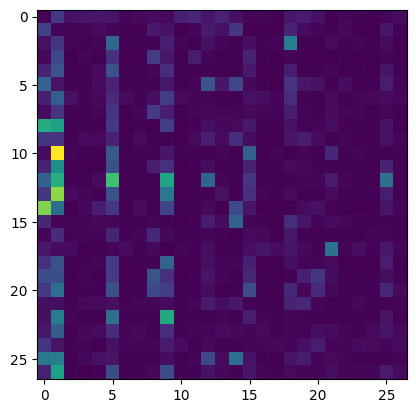

In [56]:
plt.imshow(W.exp().detach().numpy())

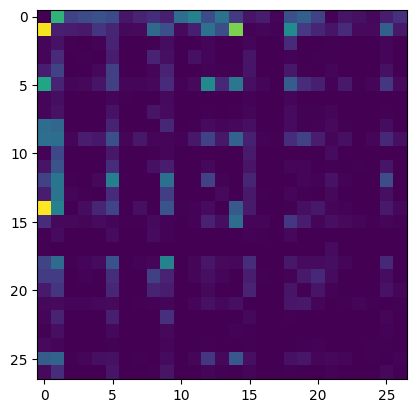

In [57]:
plt.imshow(N)

In [59]:
# Sample from neural net model

g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        # before p=P[ix]
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @W
        counts = logits.exp()
        p = counts/counts.sum(1,keepdims=True)
        
        ix = torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
